<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/capillary_pressure_data_to_understand_pore_size_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mercury saturation Pc Updated.csv to Mercury saturation Pc Updated (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mercury saturation Pc Updated.csv']))

In [ ]:
df

,Mercury sauration,Pc
0,0.000,234
1,0.041,257
2,0.075,263
3,0.121,273
4,0.158,281
5,0.208,287
6,0.280,301
7,0.326,314
8,0.375,324
9,0.415,334


Text(0.5, 1.0, 'Pore size distribution')

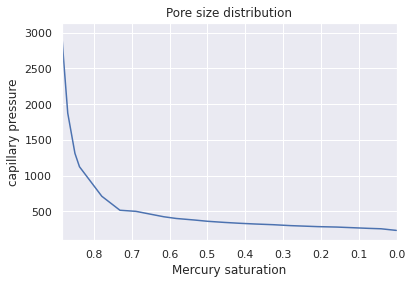

In [ ]:
plt.plot(df['Mercury sauration'], df['Pc'])
plt.xlabel("Mercury saturation")
plt.ylabel("capillary pressure")
plt.xlim(max(df['Mercury sauration']),min(df['Mercury sauration']))
plt.title('Pore size distribution')

In [ ]:
#Known data
lambd = 0.3 #Lithology factor
theta = 140
sigma = 480 #dynes/cm
K_corrected = 2 #md
phi = 0.38

In [ ]:
df['1/Pc**2'] = (1/(df['Pc']**2))
df.head()

,Mercury sauration,Pc,1/Pc**2
0,0.000,234,0.000018
1,0.041,257,0.000015
2,0.075,263,0.000014
3,0.121,273,0.000013
4,0.158,281,0.000013


Text(0.5, 1.0, 'permeability from capillary pressure')

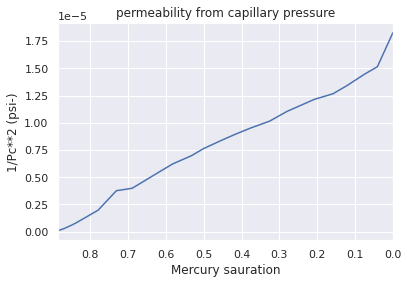

In [ ]:
plt.plot(df['Mercury sauration'], df['1/Pc**2'])
plt.xlabel("Mercury sauration")
plt.ylabel("1/Pc**2 (psi-)")
plt.xlim(max(df['Mercury sauration']),min(df['Mercury sauration']))
plt.title("permeability from capillary pressure")

In [ ]:
#Area under the curve gives the integral value for calculating the permeability
AUC = 6.64E-6

In [ ]:
# K = 10.24(sigma*cos*theta)**2 * phi *lambd(integral part (AUC))

K_abs = round(10.24 * ((sigma * (np.cos(theta * np.pi/180)))**2) * (phi * lambd * (AUC)), 3)

In [ ]:
print("The absolute permeability from purcel method is : " + str(K_abs) + ' md')

The absolute permeability from purcel method is : 1.048 md


In [ ]:
#Now pore throat sorting (PTS)
#PTS = sqrt(3rd quartile pressure/1st quartile pressure)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mercury sauration,23.0,0.487174,0.296987,0.000000e+00,0.244000,0.500000,0.755000,0.885000
Pc,23.0,715.086957,775.293898,2.340000e+02,294.000000,362.000000,614.000000,3000.000000
1/Pc**2,23.0,0.000007,0.000005,1.111111e-07,0.000003,0.000008,0.000012,0.000018


In [ ]:
third_quartile_pressure = 614.000000
first_quartile_pressure = 294.000000

In [ ]:
PTS = round(np.sqrt(third_quartile_pressure/first_quartile_pressure), 3)
PTS
#Pore throat sorting (PTS) basically provides a measure of pore geometry and the sorting of pore-throats within a rock sample

1.445

In [ ]:
print("The pore throat sorting (PTS) is : " + str(PTS))
#Thus, a value of PTS close to 1 indicates that the porous medium is well sorted, that is, capillary pressures do not change significantly (a plateau), and increasing amounts of mercury can be intruded into the pore spaces at similar applied pressures. 

The pore throat sorting (PTS) is : 1.445


In [ ]:
# Now for brooks and corey relationship to understand the pore size distribution 
# The important parameter here is Sw_star i.e. to determine the lambda (pore size distribution index)
# Sw_star = (Sw - Swi)/(1 - Swi)

Swi = 0.115 # Irreducible water saturation

In [ ]:
# To reverse the row values
#df['Sw'] = df['Mercury sauration'].iloc[::-1]

In [ ]:
df['Sw'] = (1 - df['Mercury sauration'])

In [ ]:
df.head()

,Mercury sauration,Pc,1/Pc**2,Sw
0,0.000,234,0.000018,1.000
1,0.041,257,0.000015,0.959
2,0.075,263,0.000014,0.925
3,0.121,273,0.000013,0.879
4,0.158,281,0.000013,0.842


In [ ]:
df['Sw_star'] = (df['Sw'] - Swi)/(1 - Swi)

In [ ]:
df.head()

,Mercury sauration,Pc,1/Pc**2,Sw,Sw_star
0,0.000,234,0.000018,1.000,1.000000
1,0.041,257,0.000015,0.959,0.953672
2,0.075,263,0.000014,0.925,0.915254
3,0.121,273,0.000013,0.879,0.863277
4,0.158,281,0.000013,0.842,0.821469


In [ ]:
df['ln (Sw_star)'] = np.log(df['Sw_star'])
df['ln Pc'] = np.log(df['Pc'])
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Mercury sauration,Pc,1/Pc**2,Sw,Sw_star,ln (Sw_star),ln Pc
0,0.000,234,0.000018,1.000,1.000000,0.000000,5.455321
1,0.041,257,0.000015,0.959,0.953672,-0.047435,5.549076
2,0.075,263,0.000014,0.925,0.915254,-0.088553,5.572154
3,0.121,273,0.000013,0.879,0.863277,-0.147020,5.609472
4,0.158,281,0.000013,0.842,0.821469,-0.196661,5.638355


Text(0.5, 1.0, 'Pore size distribution index (lambda from slope value of the line)')

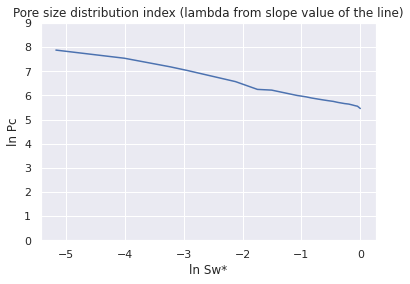

In [ ]:
plt.plot(df['ln (Sw_star)'], df['ln Pc'])
plt.xlabel("ln Sw*")
plt.ylabel("ln Pc")
plt.ylim(0,9)
plt.title("Pore size distribution index (lambda from slope value of the line)")

In [ ]:
# Python program for slope of line 
def slope(x1, y1, x2, y2): 
	return round((float)(y2-y1)/(x2-x1),3) 

# driver code	 
x1 = -0.551
y1 = 5.781
x2 = -0.832
y2 = 5.891
print ("Slope is :", (slope(x1, y1, x2, y2)))

Slope is : -0.391


In [ ]:
# Therefore -(1/lambda) (slope) = -0.391
slope_lembda = slope(x1, y1, x2, y2)

In [ ]:
pore_size_distribution_index = round(-(1/slope_lembda), 3)

In [ ]:
pore_size_distribution_index

2.558

In [ ]:
#A small value for lambda, indicates a wide range of pore sizes, while a large value indicates a narrow range.